In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns 
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

%matplotlib inline
plt.rcParams['figure.figsize']=(12,8)

In [2]:
data_location = "../Properati/properati_reducido.csv"
data = pd.read_csv(data_location, sep=",")

In [3]:
#data = pd.read_csv("/content/properati.csv",error_bad_lines=False, engine="python")#
data.head(3)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
1,8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
2,57,57,sell,store,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5639725,-58.456535",...,30.0,8333.333333,8333.333333,NaN,NaN,NaN,http://www.properati.com.ar/15bv5_venta_local_...,VENTA DE LOCAL SOBRE VÍA PÚBLICA CON RENTA - 3...,Local en Excelente Ubicación - Venta con Renta,https://thumbs4.properati.com/9/m1Sn4i7S8r5Mb-...


In [4]:
data_grupo = data.groupby('place_name')
data_belgrano = data_grupo.get_group('Belgrano')
data_colegiales = data_grupo.get_group('Colegiales')
data_nuñez = data_grupo.get_group('Nuñez')
comuna_13 = [data_belgrano, data_colegiales, data_nuñez]
data_comuna = pd.concat(comuna_13, axis=0)
data_comuna.head()

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,40.0,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...
1,8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,60.0,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...
2,57,57,sell,store,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5639725,-58.456535",...,30.0,8333.333333,8333.333333,NaN,NaN,NaN,http://www.properati.com.ar/15bv5_venta_local_...,VENTA DE LOCAL SOBRE VÍA PÚBLICA CON RENTA - 3...,Local en Excelente Ubicación - Venta con Renta,https://thumbs4.properati.com/9/m1Sn4i7S8r5Mb-...
3,120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,55.0,NaN,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"Depto de 3 amb. c/cochera cubierta, en piso 12...","Departamento con Plantas en Mendoza 2700, Capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...
4,210,210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,54.0,4210.526316,4444.444444,NaN,2.0,NaN,http://www.properati.com.ar/15dic_venta_depart...,DUPLEX CON COCHERA FIJA CUBIERTA 3 AÑOS DE ANT...,2 Ambientes Venta Belgrano Cochera Cubierta,https://thumbs4.properati.com/4/5UHwVgdJWRAYH5...


In [5]:
data_comuna = data_comuna.drop(data_comuna[data_comuna['property_type'] == 'store'].index)

In [6]:
data_comuna.shape

(4021, 27)

In [7]:
!pip install geopandas

<AxesSubplot:>

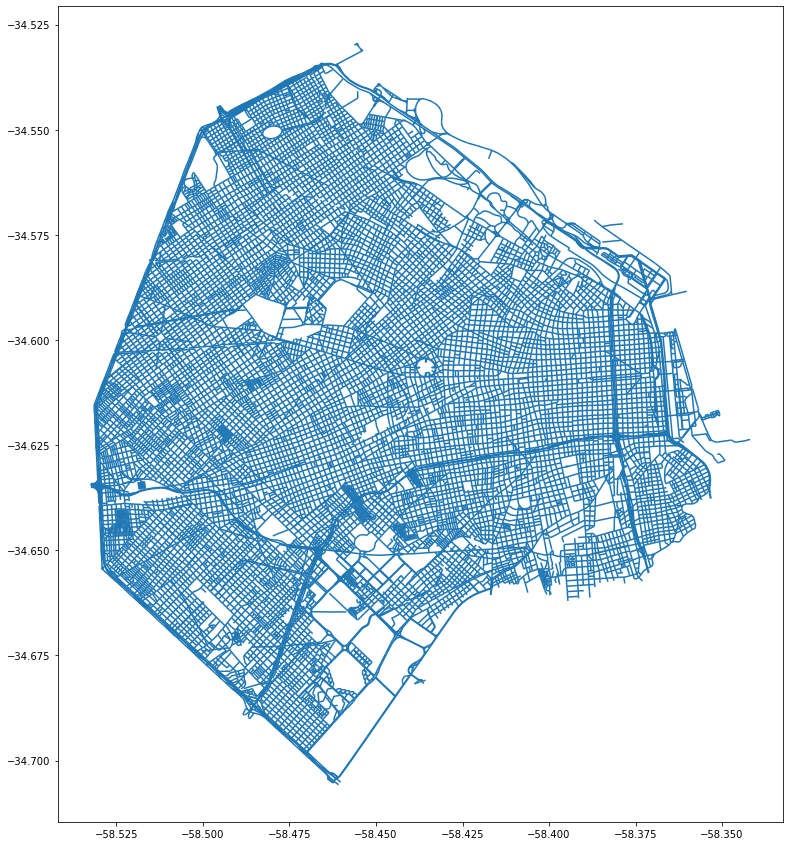

In [8]:
import geopandas as gpd

url='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/calles/callejero-ba.geojson'
calles=gpd.read_file(url)
fig,ax=plt.subplots(figsize=(15,15))
calles.plot(ax=ax)

In [9]:
#Solo nos quedamos con las calles de la comuna 13
c13=calles.loc[calles.COMUNA==13,:]
c13.BARRIO.value_counts()

BELGRANO      964
NUÑEZ         622
COLEGIALES    346
PALERMO         1
Name: BARRIO, dtype: int64

In [10]:
c13.drop([1], inplace=True)

C:\Users\krist_21mtz37\krisanaconda\envs\dhdsblend2021_geopandas\lib\site-packages\pandas\core\frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


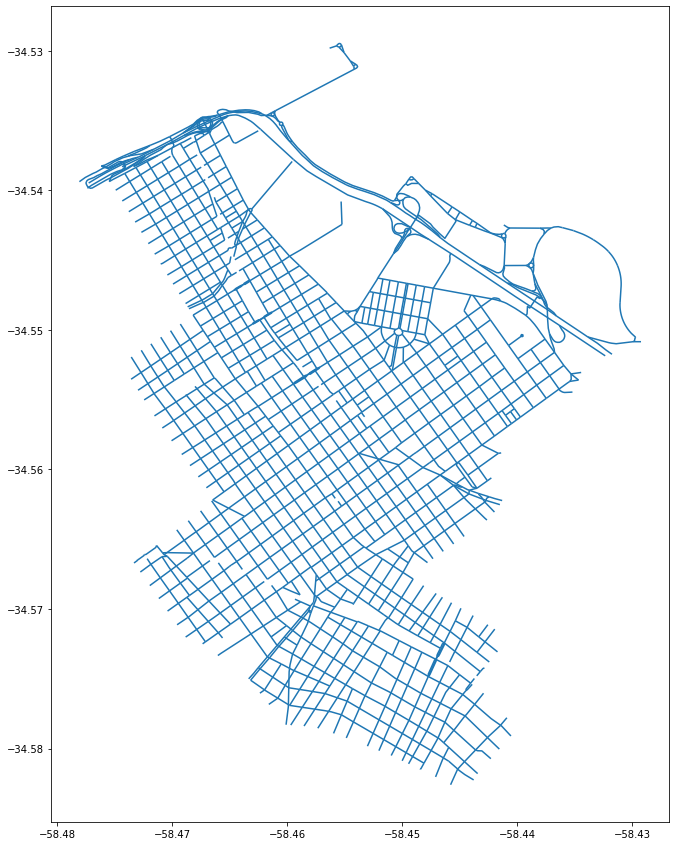

In [11]:
#Ploteamos solamente la comuna 13
fig,ax=plt.subplots(figsize=(15,15))
c13.plot(ax=ax);

In [12]:
#Busco el centroide de cada barrio
barrios=gpd.read_file('http://cdn.buenosaires.gob.ar/datosabiertos/datasets/barrios/barrios.geojson')
barriosc13=barrios.loc[barrios.comuna==13]
barriosc13

,barrio,comuna,perimetro,area,geometry
23,COLEGIALES,13,6374.619045,2.289774e+06,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5..."
43,BELGRANO,13,20609.775397,7.999240e+06,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5..."
46,NUÑEZ,13,10785.261081,4.424199e+06,"POLYGON ((-58.45872 -34.53721, -58.45887 -34.5..."


In [13]:
barriosc13['centroid']=barriosc13.geometry.centroid
barriosc13

C:\Users\krist_21mtz37\krisanaconda\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\krist_21mtz37\krisanaconda\envs\dhdsblend2021_geopandas\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


,barrio,comuna,perimetro,area,geometry,centroid
23,COLEGIALES,13,6374.619045,2.289774e+06,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5...",POINT (-58.45097 -34.57464)
43,BELGRANO,13,20609.775397,7.999240e+06,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5...",POINT (-58.45024 -34.55476)
46,NUÑEZ,13,10785.261081,4.424199e+06,"POLYGON ((-58.45872 -34.53721, -58.45887 -34.5...",POINT (-58.46275 -34.54348)


In [14]:
barriosc13['centroid lon']=barriosc13.centroid.x
barriosc13['centroid lat']=barriosc13.centroid.y
barriosc13

C:\Users\krist_21mtz37\krisanaconda\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.
C:\Users\krist_21mtz37\krisanaconda\envs\dhdsblend2021_geopandas\lib\site-packages\geopandas\geodataframe.py:853: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)
C:\Users\krist_21mtz37\krisanaconda\envs\dhdsblend2021_geopandas\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use

,barrio,comuna,perimetro,area,geometry,centroid,centroid lon,centroid lat
23,COLEGIALES,13,6374.619045,2.289774e+06,"POLYGON ((-58.44669 -34.56907, -58.44650 -34.5...",POINT (-58.45097 -34.57464),-58.450968,-34.574642
43,BELGRANO,13,20609.775397,7.999240e+06,"POLYGON ((-58.45057 -34.53561, -58.45066 -34.5...",POINT (-58.45024 -34.55476),-58.450241,-34.554763
46,NUÑEZ,13,10785.261081,4.424199e+06,"POLYGON ((-58.45872 -34.53721, -58.45887 -34.5...",POINT (-58.46275 -34.54348),-58.462751,-34.543481


In [15]:
barriosc13.loc[23,'centroid lat']

-34.57464155506328

In [16]:
dict_input_lat={'Colegiales':barriosc13.loc[23,'centroid lat'], 'Belgrano':barriosc13.loc[43,'centroid lat'],
                'Nuñez':barriosc13.loc[46,'centroid lat']}
dict_input_lon={'Colegiales':barriosc13.loc[23,'centroid lon'], 'Belgrano':barriosc13.loc[43,'centroid lon'],
                'Nuñez':barriosc13.loc[46,'centroid lon']}

In [17]:
data_comuna.lat.fillna(data_comuna.place_name.map(dict_input_lat), inplace=True)
data_comuna.lon.fillna(data_comuna.place_name.map(dict_input_lon), inplace=True)

In [18]:
#Armamos un GeoDataFrame con nuestro dataframe de propiedades

geometry=[Point(xy) for xy in zip(data_comuna['lon'], data_comuna['lat'])]
geom_data_comuna=gpd.GeoDataFrame(data_comuna,geometry=geometry)
geom_data_comuna.head(3)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,geometry
0,7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,POINT (-58.44336 -34.55987)
1,8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,POINT (-58.44336 -34.55987)
3,120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,NaN,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"Depto de 3 amb. c/cochera cubierta, en piso 12...","Departamento con Plantas en Mendoza 2700, Capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...,POINT (-58.46016 -34.56270)


#  Hospitales

In [19]:
#Armamos un GeoDataFrame con nuestro datframe de propiedades
geometry=[Point(xy) for xy in zip(data_comuna['lon'], data_comuna['lat'])]
geom_data_comuna=gpd.GeoDataFrame(data_comuna,geometry=geometry)
geom_data_comuna.head(3)

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,geometry
0,7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,3066.666667,3450.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,POINT (-58.44336 -34.55987)
1,8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,3000.000000,3250.000000,NaN,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,POINT (-58.44336 -34.55987)
3,120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,NaN,3236.363636,12.0,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"Depto de 3 amb. c/cochera cubierta, en piso 12...","Departamento con Plantas en Mendoza 2700, Capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...,POINT (-58.46016 -34.56270)


In [20]:
#Traemos el geojson de los hospitales de la pagina del gobierno
urlhospitales='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/hospitales/hospitales.geojson'
hospitales=gpd.read_file(urlhospitales)
hospitales.head(3)

,ID,NOMBRE,NOM_MAP,OBJETO,CALLE,ALTURA,DOM_NORMA,DOM_GEO,TELEFONO,GUARDIA,FAX,WEB,COD_POSTAL,TIPO,TIPO_ESPEC,MOD_AT_1,MOD_AT_2,DEPEND_ADM,DIRECTOR,geometry
0,1.0,HOSPITAL GENERAL DE NIÑOS PEDRO DE ELIZALDE,HOSP. DE ELIZALDE,HOSPITAL,MANUEL A. MONTES DE OCA,40,"MONTES DE OCA, MANUEL AV. 40","40 MONTES DE OCA, MANUEL AV.",4307-5842 / 5844,4307-5442 / 4300-1700,4302-7400,www.elizalde.gov.ar,C1270AAN,Hospital de niños,PEDIATRIA,AT. AMB./INTERNACION,DIAG./TRATAM.,Ministerio de Salud GCBA,Dr. Javier Indart,POINT (-58.37755 -34.62885)
1,2.0,HOSPITAL GENERAL DE NIÑOS RICARDO GUTIERREZ,HOSP. GUTIERREZ,HOSPITAL,GALLO,1330,GALLO 1330,1330 GALLO,4962-9247 / 9248 / 9280,4962-9232,4962-3762,www.guti.gov.ar,C1425EFD,Hospital de niños,PEDIATRIA,AT. AMB./INTERNACION,DIAG./TRATAM.,Ministerio de Salud GCBA,Dra. María Cristina Galoppo,POINT (-58.41207 -34.59419)
2,4.0,HOSPITAL DE ODONTOLOGIA DR. RAMON CARRILLO (EX...,HOSP. ODONTOLOGICO CARRILLO,HOSPITAL,SANCHEZ DE BUSTAMANTE,2529,SANCHEZ DE BUSTAMANTE 2529,2529 SANCHEZ DE BUSTAMANTE,4805-5521 / 7533,4805-6407,4805-7533,None,C1425DUY,Hospital especializado,ODONTOLOGIA,AT. AMBULATORIA,DIAG./TRATAM.,Ministerio de Salud GCBA,Dra. Susana Rita Lisanti,POINT (-58.40273 -34.58453)


In [21]:
hospitales_mask=hospitales[(hospitales.CALLE=='ECHEVERRIA')|(hospitales.CALLE=='MONROE')] #| hospitales[hospitales.CALLE=='MONROE']
#hospitales_mask
hospitales13=hospitales.iloc[[10,26]]

#  Establecimientos educativos

In [22]:
#Traemos el geojson de los establecimientos educativos de la pagina del gobierno
urleducativos='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/establecimientos-educativos/establecimientos-educativos.geojson'
educativos=gpd.read_file(urleducativos)
educativos.head(3)

educativos13=educativos.loc[educativos.COMUNA==13.0,:]
educativos13.BARRIO.value_counts()

educativos13=educativos13.drop([2767])
dh=educativos.loc[educativos.DOM_ESTABL=='Monroe 860']
dh

,OBJECTID,CUI,CUEANEXO,CUE,ANEXO,SECTOR,DOM_EDIFIC,DOM_ESTABL,NOMBRE_EST,NOMBRE_ABR,...,DEPFUN,DE,COMUNA,BARRIO,AREA_PROGR,ESTADO,POINT_X,POINT_Y,nivel,geometry
2767,2898,0202611,020304400,203044,00,2.0,Monroe 860,Monroe 860,Centro de Formación Profesional - Digital House,CFP Digital House,...,GO de Formación Laboral,10.0,13.0,BELGRANO,07 - HOSP PIROVANO,1,101789.4542,108914.4833,Otros Servicios Educativos de las modalidades ...,POINT (-58.44380 -34.54891)


#  Espacios verdes

In [23]:
#Traemos el geojson de los espacios verdes publicos de la pagina del gobierno
urlverde='http://cdn.buenosaires.gob.ar/datosabiertos/datasets/espacios-verdes/espacio-verde-publico.geojson'
verde=gpd.read_file(urlverde)

verde13=verde.loc[verde.COMUNA==13.0,:]

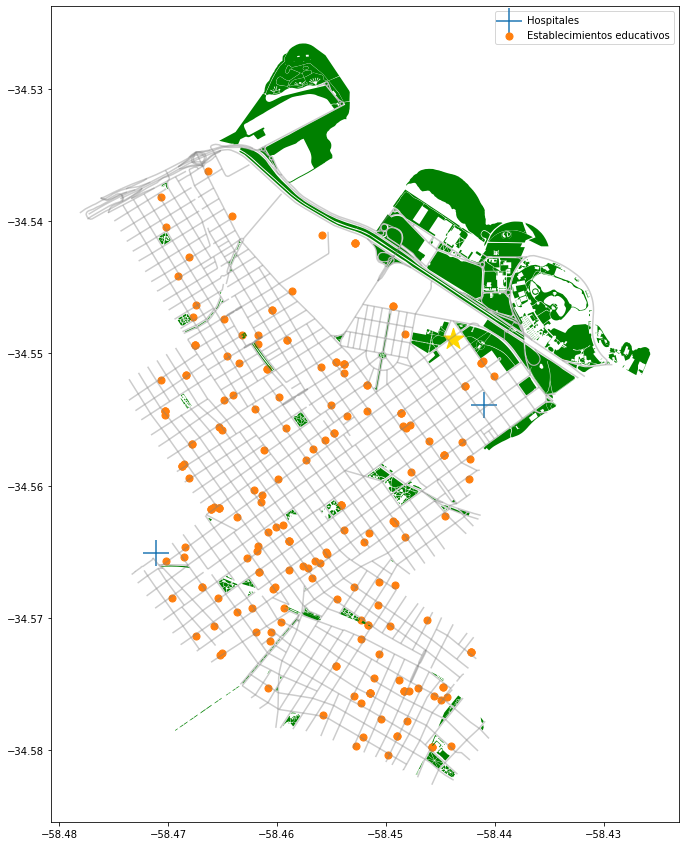

In [24]:
fig,ax=plt.subplots(figsize=(15,15))
c13.plot(ax=ax, alpha=0.4, color='grey')
f=hospitales13.plot(ax=ax,markersize=700, marker='+', label='Hospitales')
educativos13.plot(ax=ax,markersize=50, marker='o', label='Establecimientos educativos')
dh.plot(ax=ax, markersize=500, marker='*', color='gold')
verde13.plot(ax=ax,color='green', label='Espacios verdes publicos')
plt.legend(loc='best', frameon=True)

In [25]:
def distancias(df_new, name):
    geom_data_comuna_ = geom_data_comuna.copy()
    df_dists = pd.DataFrame()
    for i in range(len(df_new)):
        df_dists[i] = geom_data_comuna_.geometry.distance(df_new.geometry.iloc[i])
    geom_data_comuna_[name] = df_dists.min(axis=1)
    return geom_data_comuna_

In [26]:
geom_data_comuna=distancias(hospitales, 'Hospitales')

In [27]:
geom_data_comuna=distancias(educativos, 'Educativos')

In [28]:
geom_data_comuna=distancias(verde, 'Verde')
geom_data_comuna.head()

,Unnamed: 0,Unnamed: 0.1,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,rooms,expenses,properati_url,description,title,image_thumbnail,geometry,Hospitales,Educativos,Verde
0,7,7,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,NaN,NaN,http://www.properati.com.ar/15bot_venta_depart...,EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...,JOSE HERNANDEZ 1400 MONOAMBIENTE ESTRENAR CAT...,https://thumbs4.properati.com/1/IHxARynlr8sPEW...,POINT (-58.44336 -34.55987),0.006431,0.001038,0.001251
1,8,8,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5598729,-58.443362",...,NaN,NaN,http://www.properati.com.ar/15bou_venta_depart...,EXCELENTE DOS AMBIENTES ESTRENAR AMPLIO SUPER...,"JOSE HERNANDEZ 1400 DOS AMBIENTES ESTRENAR ,...",https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...,POINT (-58.44336 -34.55987),0.006431,0.001038,0.001251
3,120,120,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5626966465,-58.4601567114",...,NaN,NaN,http://www.properati.com.ar/15d3f_venta_depart...,"Depto de 3 amb. c/cochera cubierta, en piso 12...","Departamento con Plantas en Mendoza 2700, Capi...",https://thumbs4.properati.com/6/TvC_vWwouBg-uZ...,POINT (-58.46016 -34.56270),0.011173,0.000434,0.001092
4,210,210,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5620844,-58.4566864",...,2.0,NaN,http://www.properati.com.ar/15dic_venta_depart...,DUPLEX CON COCHERA FIJA CUBIERTA 3 AÑOS DE ANT...,2 Ambientes Venta Belgrano Cochera Cubierta,https://thumbs4.properati.com/4/5UHwVgdJWRAYH5...,POINT (-58.45669 -34.56208),0.014695,0.002619,0.000770
5,216,216,sell,apartment,Belgrano,|Argentina|Capital Federal|Belgrano|,Argentina,Capital Federal,3436077.0,"-34.5621457,-58.449657",...,4.0,NaN,http://www.properati.com.ar/15diu_venta_depart...,"Piso de categoría en Barrancas del Belgrano, e...",Piso Barrancas de Belgrano Venta 2 cocheras fi...,https://thumbs4.properati.com/3/83eGl5QZS6Glfm...,POINT (-58.44966 -34.56215),0.011967,0.000636,0.001192
